In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from datetime import date

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
df = pd.read_csv('Android_Malware.csv', low_memory = False)
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


Dzielenie na train/test/ walidacje

In [4]:
X_train, X_test_tmp, y_train, y_test_tmp = train_test_split(
    df[df.columns.values[:-1]],
    df[df.columns.values[-1]],
    test_size=0.4, random_state=213)

In [5]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test_tmp,
    y_test_tmp,
    test_size=0.5, random_state=7)

In [6]:
X_validation

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
50272,2588,10.42.0.211-106.39.162.36-57442-80-6,10.42.0.211,57442,106.39.162.36,80.0,6.0,14/06/2017 11:53:01,35650947,7,...,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
327324,69,192.229.173.136-10.42.0.211-443-38918-6,10.42.0.211,38918,192.229.173.136,443.0,6.0,30/06/2017 12:52:29,699937,16,...,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
260658,923,172.217.10.46-10.42.0.211-443-60574-6,10.42.0.211,60574,172.217.10.46,443.0,6.0,27/06/2017 03:32:04,102273543,9,...,8.0,32.0,6013171.0,0.0,6013171.0,6013171.0,24065093.0,1.987377e+07,51359046.0,6420267.0
90290,1076,139.162.2.104-10.42.0.151-80-60541-6,10.42.0.151,60541,139.162.2.104,80.0,6.0,15/06/2017 04:21:33,601732,3,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
173164,1164,10.42.0.151-119.146.74.31-37810-443-6,10.42.0.151,37810,119.146.74.31,443.0,6.0,23/06/2017 10:49:27,646388,2,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98516,432,137.175.31.97-10.42.0.211-80-34301-6,10.42.0.211,34301,137.175.31.97,80.0,6.0,15/06/2017 04:30:12,122,2,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
78057,810,10.42.0.151-31.13.71.1-45802-443-6,10.42.0.151,45802,31.13.71.1,443.0,6.0,14/06/2017 01:16:43,65111047,15,...,8.0,32.0,201829.0,0.0,201829.0,201829.0,64909173.0,0.000000e+00,64909173.0,64909173.0
317331,33,10.42.0.42-88.212.201.197-34237-443-6,88.212.201.197,443,10.42.0.42,34237.0,6.0,14/08/2017 10:40:57,2145,2,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
66837,1104,10.42.0.151-52.84.27.183-35165-443-6,10.42.0.151,35165,52.84.27.183,443.0,6.0,14/06/2017 06:47:58,30799321,2,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [7]:
df = X_train 
df["Label"] = y_train

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213378 entries, 60634 to 183595
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    213378 non-null  int64  
 1   Flow ID                       213378 non-null  object 
 2    Source IP                    213378 non-null  object 
 3    Source Port                  213378 non-null  int64  
 4    Destination IP               213378 non-null  object 
 5    Destination Port             213378 non-null  float64
 6    Protocol                     213378 non-null  float64
 7    Timestamp                    213378 non-null  object 
 8    Flow Duration                213378 non-null  int64  
 9    Total Fwd Packets            213378 non-null  int64  
 10   Total Backward Packets       213378 non-null  int64  
 11  Total Length of Fwd Packets   213378 non-null  float64
 12   Total Length of Bwd Packets  213378 non

jak wygladaja najpopularniejsze wartosci w kazdej z kolumn

In [9]:
for col in df.columns:
    print(f"Top 10 most common values in {col}:")
    print(df[col].value_counts().nlargest(10))
    print()

Top 10 most common values in Unnamed: 0:
130    104
70     102
171    101
5      101
114    100
224    100
122    100
255    100
304    100
115     99
Name: Unnamed: 0, dtype: int64

Top 10 most common values in Flow ID:
8.0.6.4-8.6.0.1-0-0-0                        1278
224.0.0.251-10.42.0.1-5353-5353-17             92
224.0.0.251-10.42.0.211-5353-5353-17           69
10.42.0.255-10.42.0.1-8612-8612-17             65
10.42.0.255-10.42.0.1-8610-8612-17             62
255.255.255.255-0.0.0.0-67-68-17               48
224.0.0.251-10.42.0.151-5353-5353-17           41
157.56.52.45-10.42.0.211-40024-60774-17        36
157.55.130.155-10.42.0.211-40008-60774-17      36
157.55.235.173-10.42.0.211-40024-60774-17      35
Name: Flow ID, dtype: int64

Top 10 most common values in  Source IP:
10.42.0.211        107241
10.42.0.151         71968
10.42.0.42          10870
8.6.0.1              1278
10.42.0.1            1098
202.77.129.150        578
119.146.74.48         527
192.229.173.173       242
6

0.000000         64585
22727.272727       129
22222.222222       117
21739.130435       107
23255.813953        86
83333.333333        85
76923.076923        77
19607.843137        73
90909.090909        69
100000.000000       63
Name:  Bwd Packets/s, dtype: int64

Top 10 most common values in  Min Packet Length:
0.0     165140
31.0      5099
36.0      4807
30.0      4154
32.0      3794
33.0      3462
34.0      3431
37.0      3342
35.0      2800
29.0      1489
Name:  Min Packet Length, dtype: int64

Top 10 most common values in  Max Packet Length:
0.0       89462
1448.0    16150
1460.0    11209
31.0       8435
1418.0     6292
517.0      3333
36.0       2180
1350.0     1864
23.0       1860
1340.0     1815
Name:  Max Packet Length, dtype: int64

Top 10 most common values in  Packet Length Mean:
0.000000      89461
20.666667      2776
36.000000      2119
7.750000       1655
31.000000      1386
66.666667       995
108.250000      946
36.666667       917
6.200000        896
172.000000      

0.0           188311
31762981.0         3
58565102.0         3
50260720.0         3
29933449.0         3
49782557.0         3
18237263.0         3
14935830.0         3
14230548.0         3
17205828.0         3
Name:  Idle Max, dtype: int64

Top 10 most common values in  Idle Min:
0.0            188311
14920282.0          3
31762981.0          3
67935268.0          3
5287450.0           3
45031322.0          3
10021285.0          3
28531356.0          3
59940497.0          3
115940546.0         3
Name:  Idle Min, dtype: int64

Top 10 most common values in Label:
Android_Adware         88343
Android_Scareware      70077
Android_SMS_Malware    40646
Benign                 14312
Name: Label, dtype: int64



ilosc unikalnych wartosci w kazdej z kolumn

In [10]:
with pd.option_context('display.max_rows', None):
    print(df.nunique(dropna=False))

Unnamed: 0                       11016
Flow ID                         136843
 Source IP                        2152
 Source Port                     44516
 Destination IP                   4233
 Destination Port                14374
 Protocol                            5
 Timestamp                       59471
 Flow Duration                  168360
 Total Fwd Packets                 518
 Total Backward Packets            772
Total Length of Fwd Packets       7895
 Total Length of Bwd Packets     17724
 Fwd Packet Length Max            1397
 Fwd Packet Length Min             177
 Fwd Packet Length Mean          24595
 Fwd Packet Length Std           31476
Bwd Packet Length Max             1240
 Bwd Packet Length Min             446
 Bwd Packet Length Mean          26458
 Bwd Packet Length Std           30165
Flow Bytes/s                    115475
 Flow Packets/s                 176661
 Flow IAT Mean                  171639
 Flow IAT Std                    99079
 Flow IAT Max            

rozklad przewidywanej cechy

<AxesSubplot:>

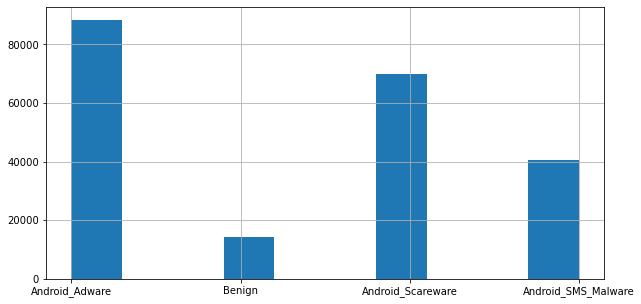

In [11]:
df.iloc[:, -1].hist()

"Adware jest niechcianym oprogramowaniem służącym do wyświetlania reklam na Twoim ekranie". Adware generuje przychody dla swoich twórców dzięki automatycznemu wyświetlaniu internetowych reklam w interfejsie użytkownika danej aplikacji lub w formie okienek wyskakujących podczas procesu instalacji.

Scareware is a type of malware attack that claims to have detected a virus or other issue on a device and directs the user to download or buy malicious software to resolve the problem. Generally speaking, scareware is the gateway to a more intricate cyberattack and not an attack in and of itself.

benign - having no harmful influence or effect

Wszystkie NA są skumulowane we wierszach które można policzyć na palcach jedner ręki można je usunąć

In [12]:
df = df.dropna()

Usunięcie kolumn które mają tylko jedną wartość

In [13]:
col_to_drop = df.columns[df.nunique() <= 1]
df = df.drop(columns = col_to_drop)

Usunięcie kolumn ID, i dwóch kolumn w których są same zera ale zapisane na różne sposoby (int, str, float)

Ta kolumna ma wartości które są int i float, zrzutujemy je na int

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213376 entries, 60634 to 183595
Data columns (total 76 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    213376 non-null  int64  
 1   Flow ID                       213376 non-null  object 
 2    Source IP                    213376 non-null  object 
 3    Source Port                  213376 non-null  int64  
 4    Destination IP               213376 non-null  object 
 5    Destination Port             213376 non-null  float64
 6    Protocol                     213376 non-null  float64
 7    Timestamp                    213376 non-null  object 
 8    Flow Duration                213376 non-null  int64  
 9    Total Fwd Packets            213376 non-null  int64  
 10   Total Backward Packets       213376 non-null  int64  
 11  Total Length of Fwd Packets   213376 non-null  float64
 12   Total Length of Bwd Packets  213376 non

In [15]:
def select_correlated_columns_to_remove(df, corr_treshold):
    cor_lis = []
    cor = df.corr(method="spearman")
    for i, _ in enumerate(cor.columns):
        for j, col_name_to_drop in enumerate(cor.columns):
            if i < j and (abs(cor.iloc[i,j]) > corr_treshold or math.isnan(cor.iloc[i,j])):
                cor_lis.append(col_name_to_drop)
    return cor_lis

In [16]:
cor_lis = select_correlated_columns_to_remove(df, 0.95)
df=df.drop(cor_lis,axis =1 )

In [17]:
def transform_data(X,y):
    df = X
    df["Label"] = y
    df = df.dropna()
    df = df.drop(columns = col_to_drop)
    df = df.drop(columns = ["Unnamed: 0", "Flow ID", " CWE Flag Count", "Fwd Avg Bytes/Bulk"])
    
    
    ip = list(df[' Source IP'])
    ip = [[int(ip[i].split('.')[j]) for j in range(len(ip[i].split('.')))] for i in range(len(ip))]
    ip = pd.DataFrame(ip).fillna(0)
    ip.columns = ['Source IP1','Source IP2',"Source IP3","Source IP4"]
    ip2 = list(df[' Destination IP'])
    ip2 = [[int(ip2[i].split('.')[j]) for j in range(len(ip2[i].split('.')))] for i in range(len(ip2))]
    ip2 = pd.DataFrame(ip2).fillna(0)
    ip2.columns = ['Destination IP1','Destination IP2',"Destination IP3","Destination IP4"]
    ip = pd.concat([ip,ip2], axis = 1)
    df = pd.concat([df.reset_index(),ip],axis = 1).drop('index', axis = 1)
    
    
    mapping_dict = {"Benign": 0,
                "Android_Scareware":1,
                "Android_Adware": 2,
                "Android_SMS_Malware":3}
    
  
    
    df["Label"] = pd.Series(df["Label"]).map(mapping_dict)
    
    one_hot = pd.get_dummies(df[' Protocol'])
    df = df.drop([' Protocol',' Timestamp'," Source IP"," Destination IP",' Down/Up Ratio'],axis = 1)
 
    
    df = df.drop(cor_lis, axis = 1, errors='ignore').astype('double')
    return df.drop("Label", axis=1), df["Label"]

In [18]:
X_test, y_test = transform_data(X_test, y_test)
X_train, y_train = transform_data(X_train, y_train)

In [19]:
#le = LabelEncoder()
#df = pd.concat([X_train,X_test], axis = 0)
#len(X_train)

In [21]:
from feature_engine.selection import SelectBySingleFeaturePerformance
sel1 = SelectBySingleFeaturePerformance(
    estimator=RandomForestClassifier(random_state=1),
    scoring='roc_auc'
)

In [22]:
X_train

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,...,Active Std,Idle Std,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4
0,54181.0,443.0,10872751.0,6.0,4.0,568.0,156.0,0.0,207.903503,0.0,...,0.0,0.0,10.0,42.0,0.0,151.0,52.0,84.0,29.0,111.0
1,53118.0,443.0,65234077.0,8.0,10.0,327.0,3872.0,0.0,79.497417,0.0,...,0.0,0.0,10.0,42.0,0.0,151.0,31.0,13.0,71.0,7.0
2,15517.0,53.0,651.0,1.0,1.0,36.0,36.0,36.0,0.000000,36.0,...,0.0,0.0,10.0,42.0,0.0,211.0,10.0,42.0,0.0,1.0
3,45784.0,80.0,574343.0,4.0,4.0,1464.0,197.0,0.0,729.335771,0.0,...,0.0,0.0,10.0,42.0,0.0,151.0,180.0,149.0,136.0,194.0
4,46477.0,80.0,393199.0,4.0,1.0,357.0,0.0,0.0,178.500000,0.0,...,0.0,0.0,10.0,42.0,0.0,211.0,203.0,205.0,158.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213371,36474.0,443.0,60469711.0,12.0,10.0,1613.0,6120.0,0.0,344.510050,0.0,...,0.0,0.0,10.0,42.0,0.0,211.0,184.0,73.0,235.0,122.0
213372,52971.0,443.0,13445274.0,7.0,6.0,335.0,4066.0,0.0,86.584118,0.0,...,0.0,0.0,10.0,42.0,0.0,211.0,31.0,13.0,71.0,52.0
213373,60184.0,443.0,1040525.0,9.0,8.0,3091.0,3931.0,0.0,508.944523,0.0,...,0.0,0.0,10.0,42.0,0.0,211.0,104.0,210.0,9.0,95.0
213374,47966.0,443.0,50868846.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,10.0,42.0,0.0,151.0,52.0,86.0,21.0,31.0


In [23]:
# Nie ma sensu za każdym razem liczyć auc, więc wczytamy już policzone. 
#Każde auc odpowiada za wykrywanie 1 kategorii więc jest ich łącznie 4.

In [24]:
auc0={' Source Port': 0.6667803137571054,
 ' Destination Port': 0.5280530163444412,
 ' Flow Duration': 0.5432468532109304,
 ' Total Fwd Packets': 0.5115232835638613,
 ' Total Backward Packets': 0.5257881750154091,
 'Total Length of Fwd Packets': 0.564206596036872,
 ' Total Length of Bwd Packets': 0.5609472971943124,
 ' Fwd Packet Length Min': 0.5288376538496439,
 ' Fwd Packet Length Std': 0.5410624009741203,
 ' Bwd Packet Length Min': 0.5310371093541425,
 ' Bwd Packet Length Std': 0.5376187852377542,
 'Flow Bytes/s': 0.5226595986307652,
 ' Flow Packets/s': 0.5341000756469306,
 ' Flow IAT Std': 0.5098433977150534,
 ' Flow IAT Min': 0.5419213925068221,
 'Fwd IAT Total': 0.5396089111679344,
 ' Fwd IAT Std': 0.5107185905594186,
 ' Fwd IAT Min': 0.549299241535541,
 'Bwd IAT Total': 0.5101626024184551,
 ' Bwd IAT Std': 0.5073457412803558,
 'Fwd PSH Flags': 0.4995634750962859,
 ' Fwd Header Length': 0.5293550369946379,
 ' Bwd Packets/s': 0.523087600852063,
 'FIN Flag Count': 0.49969180699706683,
 ' PSH Flag Count': 0.5056831548783184,
 ' ACK Flag Count': 0.5075828796322425,
 ' URG Flag Count': 0.5025464541539769,
 'Init_Win_bytes_forward': 0.5686777003883696,
 ' Init_Win_bytes_backward': 0.5744043850502205,
 ' act_data_pkt_fwd': 0.5155759304794502,
 ' min_seg_size_forward': 0.5082642067158343,
 'Active Mean': 0.5039074595954259,
 ' Active Std': 0.5008584278213167,
 ' Idle Std': 0.5016072510651556,
 'Source IP1': 0.5208522632633458,
 'Source IP2': 0.5224823089204553,
 'Source IP3': 0.522061468243979,
 'Source IP4': 0.5704274681398592,
 'Destination IP1': 0.5834675438830063,
 'Destination IP2': 0.6053260099365425,
 'Destination IP3': 0.6391564449566961,
 'Destination IP4': 0.6331360322937867}

auc1={' Source Port': 0.6095152607547952,
 ' Destination Port': 0.5260450208036361,
 ' Flow Duration': 0.5281273614448136,
 ' Total Fwd Packets': 0.5108599238826574,
 ' Total Backward Packets': 0.5179758046764285,
 'Total Length of Fwd Packets': 0.545840953226306,
 ' Total Length of Bwd Packets': 0.559587460354607,
 ' Fwd Packet Length Min': 0.5150061953828514,
 ' Fwd Packet Length Std': 0.5330914556927385,
 ' Bwd Packet Length Min': 0.5222729790837767,
 ' Bwd Packet Length Std': 0.5393663579909972,
 'Flow Bytes/s': 0.5141840016015934,
 ' Flow Packets/s': 0.5234415339130424,
 ' Flow IAT Std': 0.5073244426784005,
 ' Flow IAT Min': 0.5254465601232302,
 'Fwd IAT Total': 0.5254558091371572,
 ' Fwd IAT Std': 0.5068278697367655,
 ' Fwd IAT Min': 0.5280507427475585,
 'Bwd IAT Total': 0.5039745923406389,
 ' Bwd IAT Std': 0.5042883451291047,
 'Fwd PSH Flags': 0.5010867151639863,
 ' Fwd Header Length': 0.5231815422844631,
 ' Bwd Packets/s': 0.5163463778158034,
 'FIN Flag Count': 0.5012267692229343,
 ' PSH Flag Count': 0.501299177193454,
 ' ACK Flag Count': 0.5003763616250868,
 ' URG Flag Count': 0.5057836854464591,
 'Init_Win_bytes_forward': 0.5445225899283014,
 ' Init_Win_bytes_backward': 0.5488982957554105,
 ' act_data_pkt_fwd': 0.5131342031079205,
 ' min_seg_size_forward': 0.5080447640893865,
 'Active Mean': 0.4997263815266238,
 ' Active Std': 0.5000967069366542,
 ' Idle Std': 0.50039666411773,
 'Source IP1': 0.5120834867732361,
 'Source IP2': 0.513812621724962,
 'Source IP3': 0.5176831109568006,
 'Source IP4': 0.590142209910279,
 'Destination IP1': 0.5669543381574059,
 'Destination IP2': 0.5847780097124761,
 'Destination IP3': 0.61243985785373,
 'Destination IP4': 0.6058817694807083}

auc2={' Source Port': 0.619494360969236,

 ' Destination Port': 0.5522096964193727,
 ' Flow Duration': 0.565340184513613,
 ' Total Fwd Packets': 0.5288163459577616,
 ' Total Backward Packets': 0.5432622240389144,
 'Total Length of Fwd Packets': 0.5797146557503599,
 ' Total Length of Bwd Packets': 0.589504149307628,
 ' Fwd Packet Length Min': 0.5281609705719504,
 ' Fwd Packet Length Std': 0.5622176644585165,
 ' Bwd Packet Length Min': 0.5359076230719914,
 ' Bwd Packet Length Std': 0.5621001539754732,
 'Flow Bytes/s': 0.5384421326083486,
 ' Flow Packets/s': 0.5587014714464367,
 ' Flow IAT Std': 0.5355029736402083,
 ' Flow IAT Min': 0.5572710324588441,
 'Fwd IAT Total': 0.5552154921669692,
 ' Fwd IAT Std': 0.525457563232787,
 ' Fwd IAT Min': 0.557227927917605,
 'Bwd IAT Total': 0.5274787185312164,
 ' Bwd IAT Std': 0.5199107052302893,
 'Fwd PSH Flags': 0.5110209992354248,
 ' Fwd Header Length': 0.5649256821571141,
 ' Bwd Packets/s': 0.548567384472877,
 'FIN Flag Count': 0.4996152994949028,
 ' PSH Flag Count': 0.5064995958124713,
 ' ACK Flag Count': 0.5097289292362083,
 ' URG Flag Count': 0.5069323779637565,
 'Init_Win_bytes_forward': 0.5734484114927324,
 ' Init_Win_bytes_backward': 0.5742372376657341,
 ' act_data_pkt_fwd': 0.5250498204674048,
 ' min_seg_size_forward': 0.5428487384051487,
 'Active Mean': 0.5085359523478155,
 ' Active Std': 0.5018885551873704,
 ' Idle Std': 0.5026271133955946,
 'Source IP1': 0.5093481226733437,
 'Source IP2': 0.5127355525526736,
 'Source IP3': 0.5197810657086236,
 'Source IP4': 0.6292940726601796,
 'Destination IP1': 0.6000708569101265,
 'Destination IP2': 0.6179593909811868,
 'Destination IP3': 0.6542533934055511,
 'Destination IP4': 0.6413952745660961}

auc3={' Source Port': 0.6379991311189014,
 ' Destination Port': 0.5563665831240362,
 ' Flow Duration': 0.5529182319576855,
 ' Total Fwd Packets': 0.5345564020394712,
 ' Total Backward Packets': 0.5387853249046745,
 'Total Length of Fwd Packets': 0.5813068547666688,
 ' Total Length of Bwd Packets': 0.5878820742615405,
 ' Fwd Packet Length Min': 0.5340162772250147,
 ' Fwd Packet Length Std': 0.5628073596857487,
 ' Bwd Packet Length Min': 0.5443412553308494,
 ' Bwd Packet Length Std': 0.5596898660930836,
 'Flow Bytes/s': 0.5295650431784452,
 ' Flow Packets/s': 0.5470448477668078,
 ' Flow IAT Std': 0.5176486127553078,
 ' Flow IAT Min': 0.5521831300555938,
 'Fwd IAT Total': 0.5376555620659789,
 ' Fwd IAT Std': 0.512648110710675,
 ' Fwd IAT Min': 0.5392868522482441,
 'Bwd IAT Total': 0.5126170390994146,
 ' Bwd IAT Std': 0.5101814178361082,
 'Fwd PSH Flags': 0.5156249122280595,
 ' Fwd Header Length': 0.5775761891744442,
 ' Bwd Packets/s': 0.5442219795089852,
 'FIN Flag Count': 0.5018783188361402,
 ' PSH Flag Count': 0.5106739226613008,
 ' ACK Flag Count': 0.5116913166044152,
 ' URG Flag Count': 0.5036676099161546,
 'Init_Win_bytes_forward': 0.5839914725418078,
 ' Init_Win_bytes_backward': 0.5876287945470929,
 ' act_data_pkt_fwd': 0.5315391349473729,
 ' min_seg_size_forward': 0.5618074944179611,
 'Active Mean': 0.5017283625995507,
 ' Active Std': 0.5003691000455467,
 ' Idle Std': 0.5001430264872218,
 'Source IP1': 0.5192414158227315,
 'Source IP2': 0.5210207880736546,
 'Source IP3': 0.526187117293753,
 'Source IP4': 0.6431843405311595,
 'Destination IP1': 0.6118328221676916,
 'Destination IP2': 0.6287977678219656,
 'Destination IP3': 0.650626178105102,
 'Destination IP4': 0.6428527493983265}

In [32]:
# Gdy policzymy sumę auc widzimy, że połowa zmiennych nie jest w stanie wykryć żadnej kategorii. Bo min AUC to 0.5 wiec min sumy
# to 2
f = [a0+a1+a2+a3 for a0,a1,a2,a3 in zip(list(auc0.values()),list(auc1.values()),list(auc2.values()),list(auc3.values())) ]
fcol = list(pd.DataFrame( f,list(auc1.keys())).sort_values(by = 0, ascending = False).head(6).index)
pd.DataFrame( f,list(auc1.keys())).sort_values(by = 0, ascending = False)

,0
Destination IP3,2.556476
Source Port,2.533789
Destination IP4,2.523266
Destination IP2,2.436861
Source IP4,2.433048
Destination IP1,2.362326
Total Length of Bwd Packets,2.297921
Init_Win_bytes_backward,2.285169
Total Length of Fwd Packets,2.271069
Init_Win_bytes_forward,2.270640


In [34]:
#Tylko 6 zmiennych łącznie przebija 2.30
X_train[fcol]

,Destination IP3,Source Port,Destination IP4,Destination IP2,Source IP4,Destination IP1
0,29.0,54181.0,111.0,84.0,151.0,52.0
1,71.0,53118.0,7.0,13.0,151.0,31.0
2,0.0,15517.0,1.0,42.0,211.0,10.0
3,136.0,45784.0,194.0,149.0,151.0,180.0
4,158.0,46477.0,63.0,205.0,211.0,203.0
...,...,...,...,...,...,...
213371,235.0,36474.0,122.0,73.0,211.0,184.0
213372,71.0,52971.0,52.0,13.0,211.0,31.0
213373,9.0,60184.0,95.0,210.0,211.0,104.0
213374,21.0,47966.0,31.0,86.0,151.0,52.0


In [29]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!





model=XGBClassifier(random_state=1,
                    n_estimators = 100,
                    learning_rate=0.75, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=15
                    )
model.fit(X_train[fcol], y_train)
model.score(X_test[fcol],y_test)

0.7783167425904055

<AxesSubplot:>

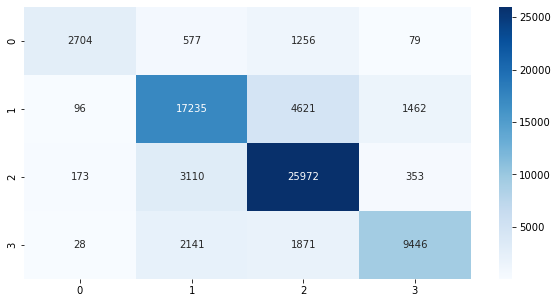

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predicted = model.predict(X_test[fcol])
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,cmap='Blues', fmt='g')

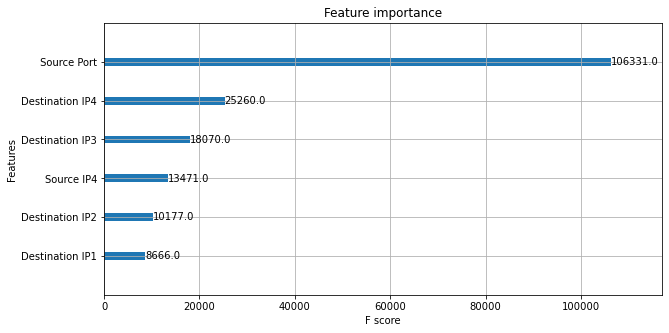

In [31]:
from xgboost import plot_importance
plot_importance(model)
plt.show()